In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPool2D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip new.zip

In [ ]:
Categories = ["anemia" , "non-anemia"]

In [ ]:
data_dir = '/content/new'

In [ ]:
data = []                                                         # iterating through the images path and appending the image and labels in data list
for category in Categories:
  path = os.path.join(data_dir,category)
  class_num = Categories.index(category)
  for img in os.listdir(path):
    img_arr = cv.imread(os.path.join(path,img))
    re = cv.resize(img_arr,(64,64))
    data.append([re,class_num])

In [ ]:
np.random.shuffle(data)

In [ ]:
x_data = []                    # iterating through the data list and append the images to x_data and labels to the y_data
y_data = []
for features,labels in data:
  x_data.append(features)
  y_data.append(labels)

In [ ]:
x_data = np.array(x_data)       #converting the images and labels into numpy array
y_data = np.array(y_data)

In [ ]:
print(f"shape of x data {x_data.shape}")
print(f"shape of y data {y_data.shape}")

shape of x data (4262, 64, 64, 3)
shape of y data (4262,)


In [ ]:
x_data = x_data/255

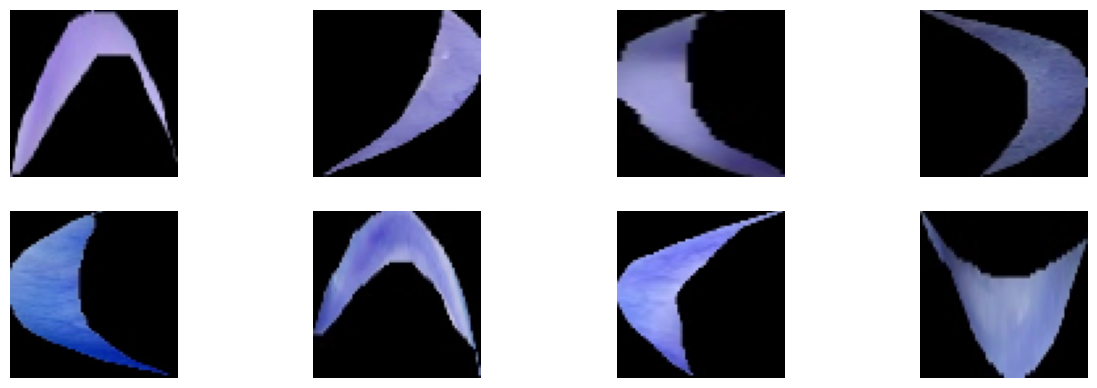

In [ ]:
plt.figure(figsize=(15,10))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.imshow(x_data[i])
  plt.axis("off")

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=22)

In [ ]:
print(f"shape of x train {x_train.shape}")
print(f"shape of y train {y_train.shape}")
print(f"shape of x test {x_test.shape}")
print(f"shape of y train {y_test.shape}")

shape of x train (3409, 64, 64, 3)
shape of y train (3409,)
shape of x test (853, 64, 64, 3)
shape of y train (853,)


In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0],-1)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train_reshaped,y_train)
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)
y_pred_xgb = xgb_clf.predict(x_test_reshaped)

In [ ]:
y_pred_xgb = xgb_clf.predict(x_test_reshaped)

import pickle
from google.colab import files

# Assuming xgb_clf is your XGBoost model
# Save the trained model using pickle
with open('anemia_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

# Download the saved model file
files.download('anemia_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f"the accuracy of the xgb classifier is {accuracy_score(y_pred_xgb,y_test)}")

the accuracy of the xgb classifier is 0.9038686987104337


In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       513
           1       0.91      0.84      0.87       340

    accuracy                           0.90       853
   macro avg       0.91      0.89      0.90       853
weighted avg       0.90      0.90      0.90       853



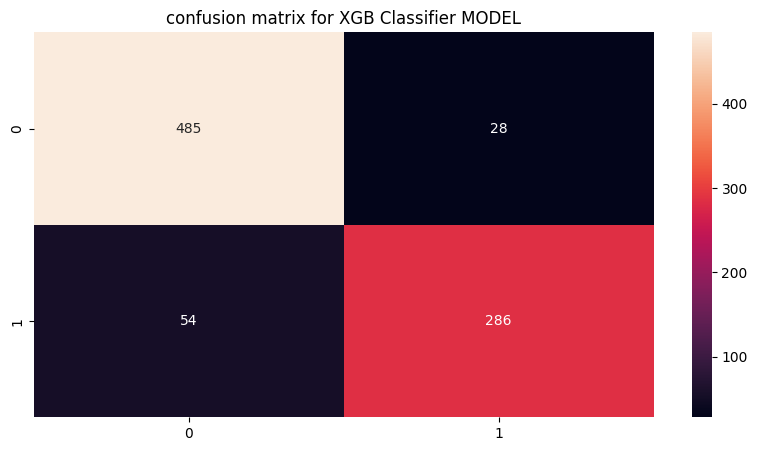

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='g')
plt.title("confusion matrix for XGB Classifier MODEL")
plt.show()

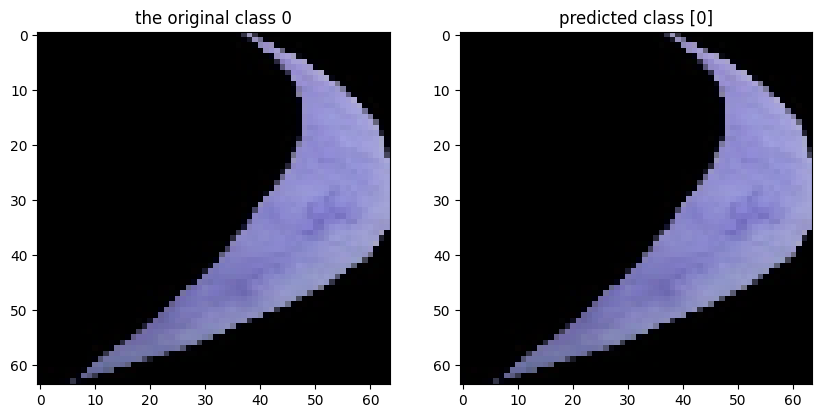

In [ ]:
predictions = xgb_clf.predict(x_test[0].reshape(1,-1))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions}")
plt.show()

In [ ]:
model = Sequential()                      # creating a sequential cnn model
model.add(Conv2D(100 , (3,3) , input_shape=(64,64,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(150 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100 , activation="relu"))
model.add(Dense(2 , activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=20)

Epoch 1/20
152/171 [=========================>....] - ETA: 10s - loss: 0.6674 - accuracy: 0.6082

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("the accuracy score for the model is " ,accuracy_score(y_test,y_pred.argmax(axis=1)))

In [ ]:
print(classification_report(y_test,y_pred.argmax(axis=1)))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.title("confusion matrix for CNN Model")
plt.show()

In [ ]:
predictions = model.predict(x_test[0].reshape(1,64,64,3))

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions.argmax(axis=1)}")
plt.show()